# Linear Regression for Single Variable

### Predict canada's per capita income in year 2020. Download canada_per_capita.csv file from the dataset folder. Using this csv file build a regression model and predict the per capita income fo canadian citizens in year 2020

#### Answer : 41288.69409442

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [4]:
df=pd.read_csv('canada_per_capita.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


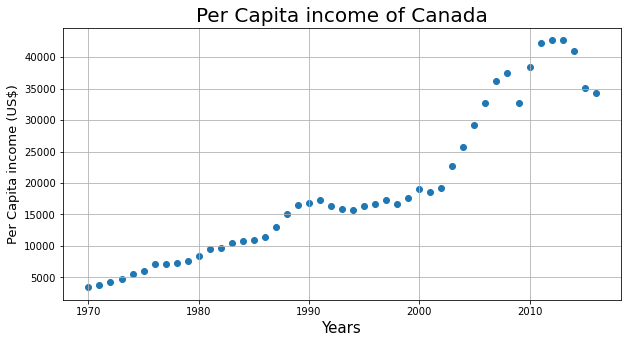

In [5]:
plt.figure(figsize=(10,5))
plt.scatter(df.year,df['per capita income (US$)'])
plt.xlabel('Years',fontsize=15)
plt.ylabel('Per Capita income (US$)',fontsize=13)
plt.title('Per Capita income of Canada',fontsize=20)
plt.grid()

In [6]:
new_df=df.drop('per capita income (US$)',axis='columns')
new_df.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [7]:
percapita=df['per capita income (US$)']
percapita.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [8]:
reg=linear_model.LinearRegression()
reg.fit(new_df,percapita)

LinearRegression()

In [9]:
reg.predict([[2020]])

array([41288.69409442])

In [10]:
result=reg.predict(new_df)
result

array([ -134.55966672,   693.9054085 ,  1522.37048373,  2350.83555895,
        3179.30063417,  4007.7657094 ,  4836.23078462,  5664.69585984,
        6493.16093506,  7321.62601029,  8150.09108551,  8978.55616073,
        9807.02123595, 10635.48631118, 11463.9513864 , 12292.41646162,
       13120.88153685, 13949.34661207, 14777.81168729, 15606.27676251,
       16434.74183774, 17263.20691296, 18091.67198818, 18920.1370634 ,
       19748.60213863, 20577.06721385, 21405.53228907, 22233.9973643 ,
       23062.46243952, 23890.92751474, 24719.39258996, 25547.85766519,
       26376.32274041, 27204.78781563, 28033.25289085, 28861.71796608,
       29690.1830413 , 30518.64811652, 31347.11319175, 32175.57826697,
       33004.04334219, 33832.50841741, 34660.97349264, 35489.43856786,
       36317.90364308, 37146.3687183 , 37974.83379353])

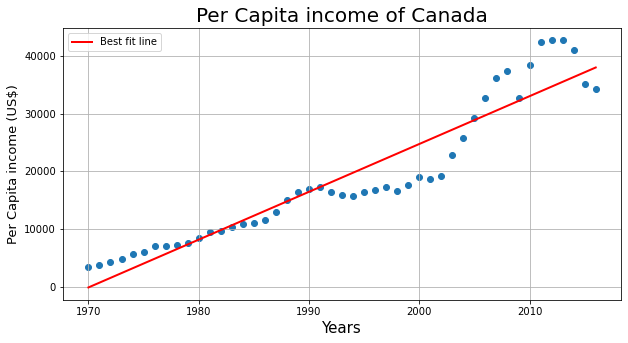

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(df.year,df['per capita income (US$)'])
plt.plot(df.year,result,color='red',linewidth=2,label='Best fit line')
plt.xlabel('Years',fontsize=15)
plt.ylabel('Per Capita income (US$)',fontsize=13)
plt.title('Per Capita income of Canada',fontsize=20)
plt.grid()
plt.legend()

# Linear Regression with multiple variables

### In dataset folder there is a file called hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates.

### ---> 2 yr experience, 9 test score, 6 interview score 
#### Answer : 53205.96797671

### ---> 12 yr experience, 10 test score, 10 interview score
#### Answer : 92002.18340611

In [14]:
data=pd.read_csv('hiring.csv')
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [18]:
from word2number import w2n

In [24]:
data['experience']=data.experience.fillna('zero')
data.experience.apply(w2n.word_to_num)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [40]:
median=data['test_score(out of 10)'].median()
median

8.0

In [38]:
data['test_score(out of 10)']=data['test_score(out of 10)'].fillna(median)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [30]:
model=linear_model.LinearRegression()
model.fit(data[['experience','test_score(out of 10)','interview_score(out of 10)']],data['salary($)'])

LinearRegression()

In [31]:
model.predict([[2,9,6]])

array([53205.96797671])

In [32]:
model.predict([[12,10,10]])

array([92002.18340611])